### Handzeichen 0 - 6

In [47]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from keras.utils import to_categorical
%matplotlib inline

train_dataset = h5py.File('data/train_signs.h5', "r")
x_train = np.array(train_dataset["train_set_x"][:]) # your train set features
y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('data/test_signs.h5', "r")
x_test = np.array(test_dataset["test_set_x"][:]) # your test set features
y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)
x_train, x_Test = x_train / 255. - 0.5 , x_test / 255. - 0.5   # die - 0.5 sind ziemlich wichtig

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train.shape, y_train.shape

((1080, 64, 64, 3), (1080, 6))

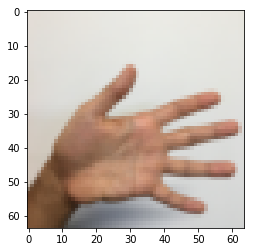

In [51]:
index = 0
plt.imshow(x_train[index] + 0.5)    # zum Anschauen wieder die 0.5 draufaddieren


In [55]:
a = 5.6
type()

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Flatten(input_shape = (64,64,3)))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32)

model.save('sign01.h5')
model.evaluate(x_train, y_train) 
model.evaluate(x_test, y_test)

Epoch 1/10
1080/1080 [==============================] - 1s 849us/step - loss: 3.2644 - acc: 0.2954
Epoch 2/10
1080/1080 [==============================] - 1s 550us/step - loss: 1.3987 - acc: 0.4750
Epoch 3/10
1080/1080 [==============================] - 1s 613us/step - loss: 1.1687 - acc: 0.5722
Epoch 4/10
1080/1080 [==============================] - 1s 592us/step - loss: 1.0251 - acc: 0.6102
Epoch 5/10
1080/1080 [==============================] - 1s 583us/step - loss: 0.9878 - acc: 0.6333
Epoch 6/10
1080/1080 [==============================] - 1s 561us/step - loss: 0.8672 - acc: 0.6731
Epoch 7/10
1080/1080 [==============================] - 1s 565us/step - loss: 0.7802 - acc: 0.7306
Epoch 8/10
1080/1080 [==============================] - 1s 562us/step - loss: 0.6841 - acc: 0.7648
Epoch 9/10
1080/1080 [==============================] - 1s 560us/step - loss: 0.6701 - acc: 0.7583
Epoch 10/10
120/120 [==============================] - 0s 173us/step


[10.868895276387532, 0.31666666865348814]

C:\Users\khthe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([[0.006872  , 0.06024799, 0.0492528 , 0.66385645, 0.11776266,
         0.10200817]], dtype=float32), 3)

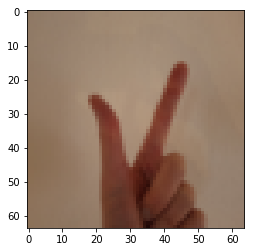

In [11]:
fname = "data/finger19.jpg" 
image = np.array(plt.imread(fname))
image = scipy.misc.imresize(image, size=(64,64))

plt.imshow(image)
a = model.predict(image.reshape(1, 64, 64, 3))
a, np.argmax(a)

### MNIST - Fashion

In [25]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.

y_train = to_categorical(y_train, 10)
x_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation

 
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32)



Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.5499 - acc: 0.8099
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.4215 - acc: 0.8506
Epoch 3/10
17248/60000 [=======>......................] - ETA: 1s - loss: 0.3941 - acc: 0.8617

KeyboardInterrupt: 

In [31]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 160s 3ms/step - loss: 0.2540 - acc: 0.9220 - val_loss: 0.0615 - val_acc: 0.9776
Epoch 2/12
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0914 - acc: 0.9729 - val_loss: 0.0425 - val_acc: 0.9850
Epoch 3/12
35712/60000 [================>.............] - ETA: 1:00 - loss: 0.0681 - acc: 0.9794

KeyboardInterrupt: 